In [1]:
import subprocess
import pandas as pd
from pathlib import Path
import polars as pl
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc

pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',None)

ROOT=Path("/home/local/Downloads/parquet_files")
TRAIN_DIR=ROOT/"train"
TEST_DIR=ROOT/"test"


In [2]:
#read the files number
dirs=[TRAIN_DIR,TEST_DIR]
for dir in dirs:
    print(f"files under {dir}: {len(list(dir.glob('*parquet')))}")


#read the train files size
cmd=f'du {TRAIN_DIR}/* -mh|sort -rh '
res=subprocess.run(cmd,shell=True,stdout=subprocess.PIPE,text=True)
res_=res.stdout.split('\n')
res1=[line.split("\t") for line in res_ if line]
red=pd.DataFrame(res1,columns=["size","path"])
red["filename"]=red["path"].str.replace("train_","").apply(lambda x:Path(x).stem)

#read the test files size
cmd=f'du {TEST_DIR}/* -h|sort -rh '
res_test=subprocess.run(cmd,shell=True,stdout=subprocess.PIPE,text=True)
res_test_=res_test.stdout.split('\n')
res1_test=[line.split("\t") for line in res_test_ if line]
red_test=pd.DataFrame(res1_test,columns=["size","path"])
red_test["filename"]=red_test["path"].str.replace("test_","").apply(lambda x:Path(x).stem)

red_test.merge(red,on="filename",how="left",suffixes=("_test","_train")).sort_values(by="filename")



files under /home/local/Downloads/parquet_files/train: 32
files under /home/local/Downloads/parquet_files/test: 36


,size_test,path_test,filename,size_train,path_train
12,32K,/home/local/Downloads/parquet_files/test/test_applprev_1_0.parquet,applprev_1_0,103M,/home/local/Downloads/parquet_files/train/train_applprev_1_0.parquet
11,32K,/home/local/Downloads/parquet_files/test/test_applprev_1_1.parquet,applprev_1_1,70M,/home/local/Downloads/parquet_files/train/train_applprev_1_1.parquet
10,32K,/home/local/Downloads/parquet_files/test/test_applprev_1_2.parquet,applprev_1_2,NaN,NaN
33,8.0K,/home/local/Downloads/parquet_files/test/test_applprev_2.parquet,applprev_2,28M,/home/local/Downloads/parquet_files/train/train_applprev_2.parquet
35,4.0K,/home/local/Downloads/parquet_files/test/test_base.parquet,base,6.8M,/home/local/Downloads/parquet_files/train/train_base.parquet
7,60K,/home/local/Downloads/parquet_files/test/test_credit_bureau_a_1_0.parquet,credit_bureau_a_1_0,62M,/home/local/Downloads/parquet_files/train/train_credit_bureau_a_1_0.parquet
6,60K,/home/local/Downloads/parquet_files/test/test_credit_bureau_a_1_1.parquet,credit_bureau_a_1_1,175M,/home/local/Downloads/parquet_files/train/train_credit_bureau_a_1_1.parquet
5,60K,/home/local/Downloads/parquet_files/test/test_credit_bureau_a_1_2.parquet,credit_bureau_a_1_2,118M,/home/local/Downloads/parquet_files/train/train_credit_bureau_a_1_2.parquet
4,60K,/home/local/Downloads/parquet_files/test/test_credit_bureau_a_1_3.parquet,credit_bureau_a_1_3,69M,/home/local/Downloads/parquet_files/train/train_credit_bureau_a_1_3.parquet
3,60K,/home/local/Downloads/parquet_files/test/test_credit_bureau_a_1_4.parquet,credit_bureau_a_1_4,NaN,NaN


# READ TRAIN BASE FILE

MONTH
202004      8289
202010      8592
202005     28725
202007     28912
202006     45962
202008     50831
202003     60748
202009     61905
201902     63064
201905     64594
201903     69147
201904     72012
202002     75183
201901     75529
202001     86750
201906     94398
201910     95149
201907     97566
201909     98706
201908     98741
201911    115845
201912    126011
Name: count, dtype: int64

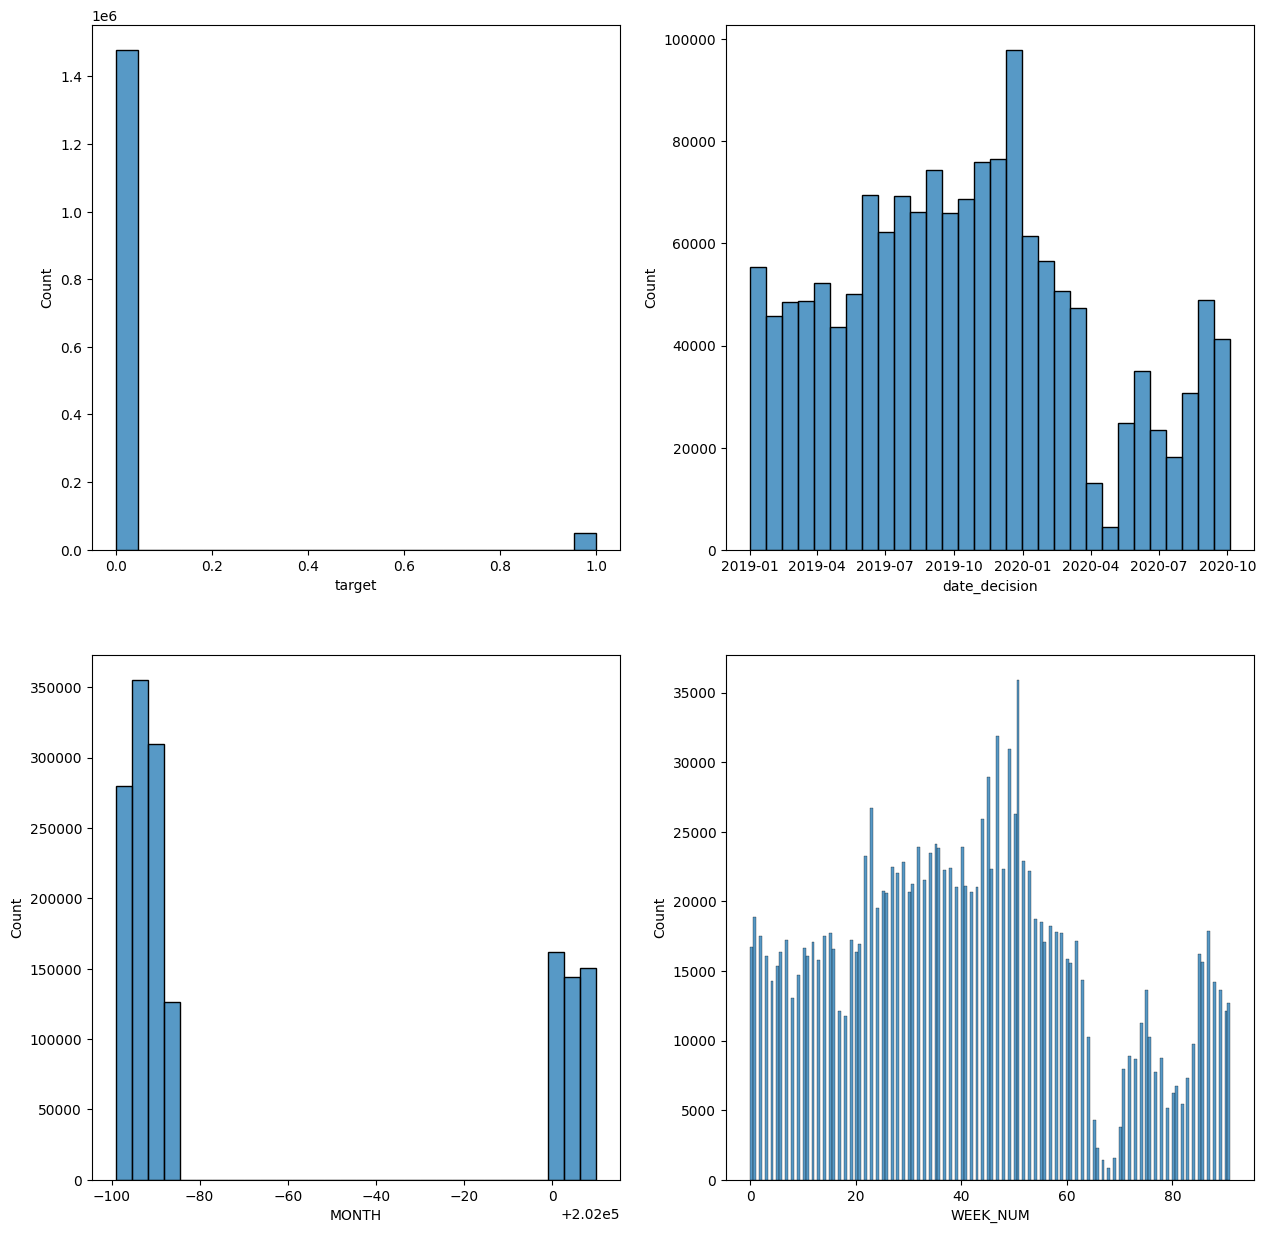

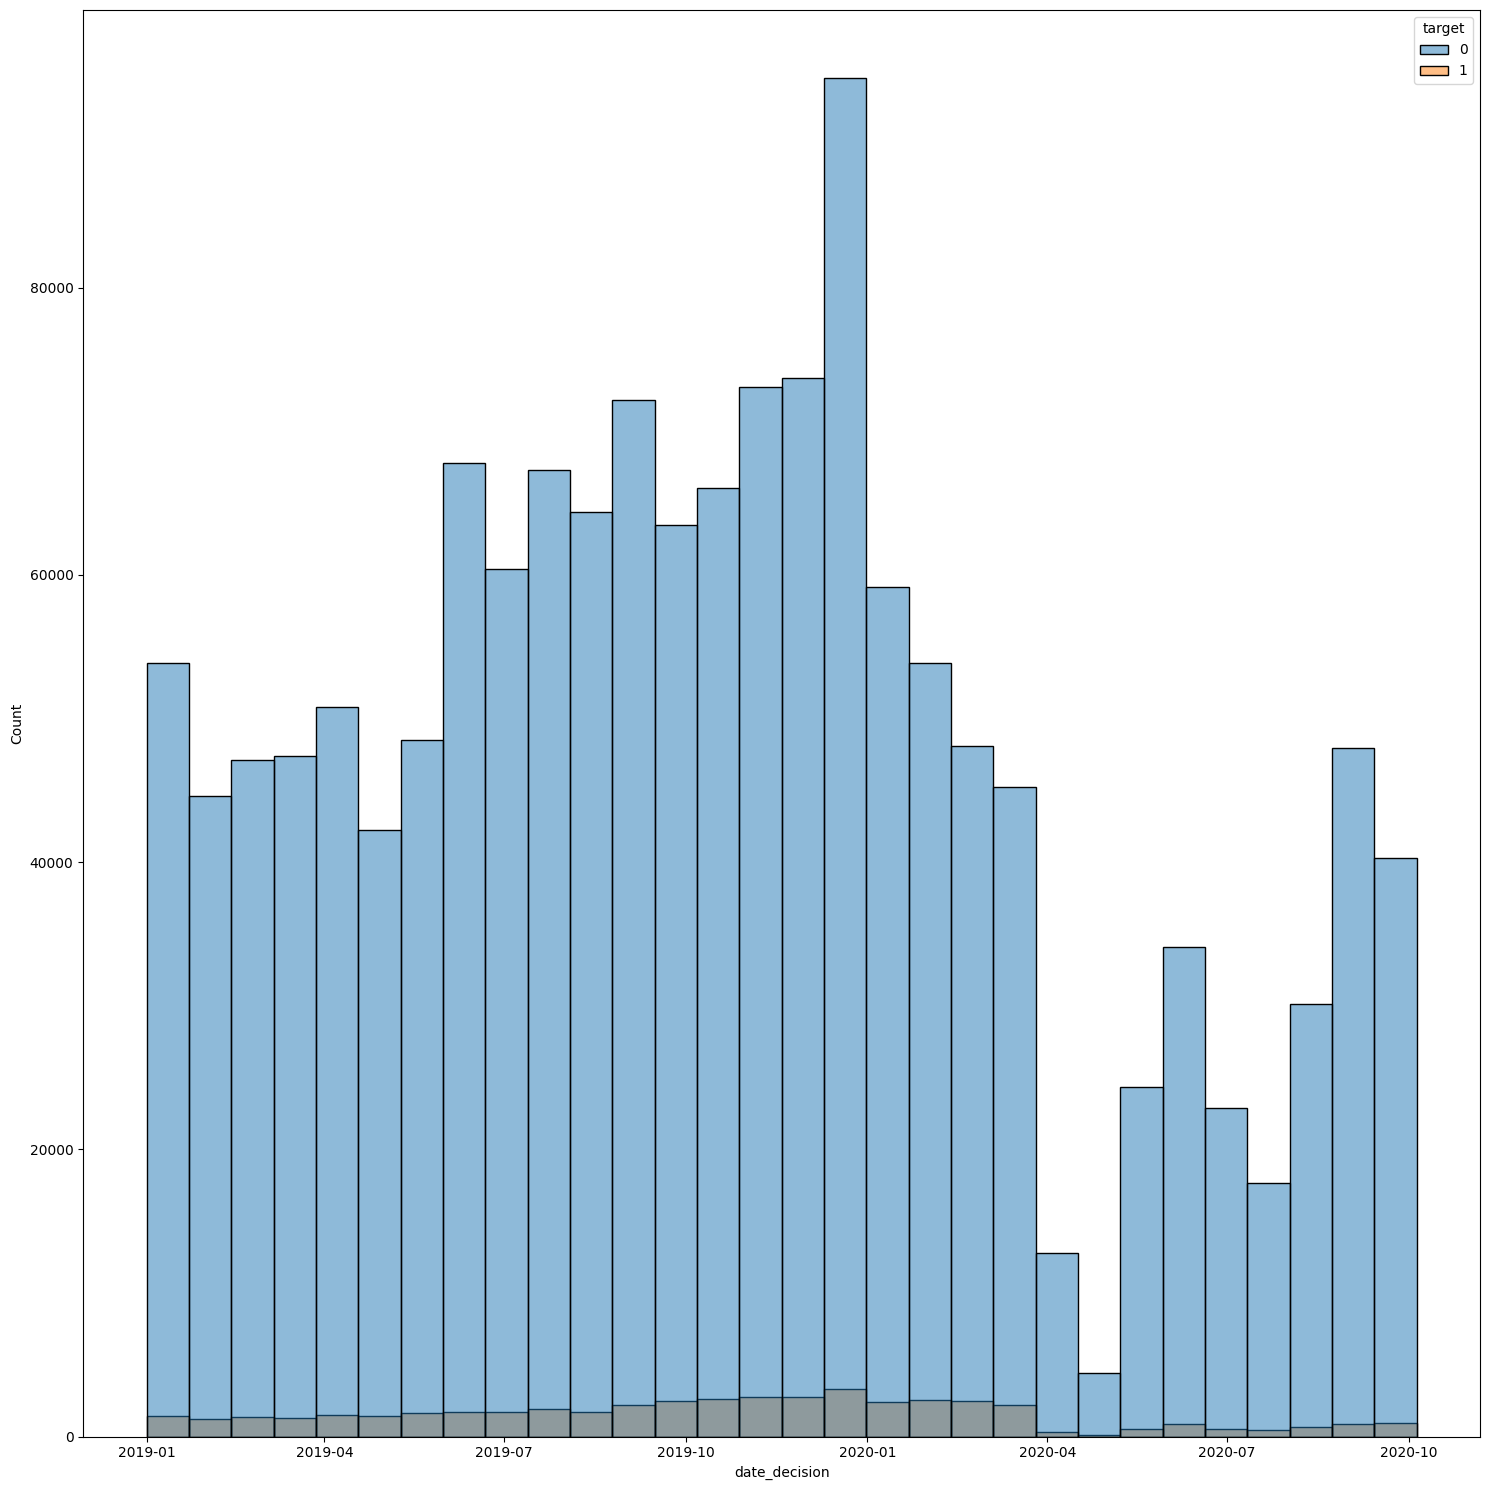

In [93]:
#we use pandas dataframe as the file is not that large
from matplotlib.pyplot import xlim
from numpy import stack

train_base=pd.read_parquet(TRAIN_DIR/"train_base.parquet")

#cast the datatypes to save memory
train_base["date_decision"]=pd.to_datetime(train_base["date_decision"])
train_base["case_id"]=pd.to_numeric(train_base["case_id"],downcast="integer")
train_base["MONTH"]=pd.to_numeric(train_base["MONTH"],downcast="integer")
train_base["WEEK_NUM"]=pd.to_numeric(train_base["WEEK_NUM"],downcast="integer")
train_base["target"]=pd.to_numeric(train_base["target"],downcast="integer")
train_base["date_decision"].drop_duplicates().sort_values().diff().sum().days
len(train_base["date_decision"].unique())
train_base["date_decision"].dt.date.max()
target_cnt=train_base.target.value_counts().hist
fig,axes=plt.subplots(2,2)
plt.rc("figure",figsize=(15,15))
sns.histplot(train_base["target"],ax=axes[0,0]);
sns.histplot(train_base["date_decision"],bins=30,ax=axes[0,1]);
sns.histplot(train_base["MONTH"],ax=axes[1,0],bins=30);
sns.histplot(train_base["WEEK_NUM"],ax=axes[1,1]);
#axes[1,0].set_xticks([201901, 201902, 201903, 201904, 201905, 201906, 201907, 201908, 201909,
#       201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006,
#       202007, 202008, 202009, 202010])
#axes[1,0].set_xticklabels([1, 2, 3, 4, 5, 6, 7, 8, 9,
#       10, 11, 12, 1, 2, 3, 4, 5, 6,
#       7, 8, 9, 10],rotation=180)
#axes[1,0].set_xlim([202001,202010])
fig2=plt.figure()
sns.histplot(train_base,x="date_decision",bins=30,hue="target");
plt.tight_layout()
train_base["MONTH"].value_counts().sort_values()


In [ ]:
#check the proportion of null values in train files
total_nulls=[]
shapes=[]
for file in red.path:
    df=pl.read_parquet(file)
    total_nulls.append(df.null_count().to_pandas().sum().sum())
    shapes.append(np.prod(df.shape))
    del df
red["total_nulls"]=total_nulls
red["total_records"]=shapes


# READ OTHER FILES

In [6]:
#we checked some files, the files are large, we need polars to analyze
train_applprev_1_0=pl.read_parquet(TRAIN_DIR/"train_tax_registry_a_1.parquet")
train_applprev_1_0

case_id,annualeffectiverate_199L,annualeffectiverate_63L,classificationofcontr_13M,classificationofcontr_400M,contractst_545M,contractst_964M,contractsum_5085717L,credlmt_230A,credlmt_935A,dateofcredend_289D,dateofcredend_353D,dateofcredstart_181D,dateofcredstart_739D,dateofrealrepmt_138D,debtoutstand_525A,debtoverdue_47A,description_351M,dpdmax_139P,dpdmax_757P,dpdmaxdatemonth_442T,dpdmaxdatemonth_89T,dpdmaxdateyear_596T,dpdmaxdateyear_896T,financialinstitution_382M,financialinstitution_591M,instlamount_768A,instlamount_852A,interestrate_508L,lastupdate_1112D,lastupdate_388D,monthlyinstlamount_332A,monthlyinstlamount_674A,nominalrate_281L,nominalrate_498L,num_group1,numberofcontrsvalue_258L,…,numberofoverdueinstlmax_1039L,numberofoverdueinstlmax_1151L,numberofoverdueinstlmaxdat_148D,numberofoverdueinstlmaxdat_641D,numberofoverdueinstls_725L,numberofoverdueinstls_834L,outstandingamount_354A,outstandingamount_362A,overdueamount_31A,overdueamount_659A,overdueamountmax2_14A,overdueamountmax2_398A,overdueamountmax2date_1002D,overdueamountmax2date_1142D,overdueamountmax_155A,overdueamountmax_35A,overdueamountmaxdatemonth_284T,overdueamountmaxdatemonth_365T,overdueamountmaxdateyear_2T,overdueamountmaxdateyear_994T,periodicityofpmts_1102L,periodicityofpmts_837L,prolongationcount_1120L,prolongationcount_599L,purposeofcred_426M,purposeofcred_874M,refreshdate_3813885D,residualamount_488A,residualamount_856A,subjectrole_182M,subjectrole_93M,totalamount_6A,totalamount_996A,totaldebtoverduevalue_178A,totaldebtoverduevalue_718A,totaloutstanddebtvalue_39A,totaloutstanddebtvalue_668A
i64,f64,f64,str,str,str,str,f64,f64,f64,str,str,str,str,str,f64,f64,str,f64,f64,f64,f64,f64,f64,str,str,f64,f64,f64,str,str,f64,f64,f64,f64,i64,f64,…,f64,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str,f64,f64,str,str,f64,f64,f64,f64,f64,f64
388,null,null,"""ea6782cc""","""a55475b1""","""7241344e""","""a55475b1""",null,null,135806.0,"""2020-08-06""",null,null,"""2018-08-06""",null,null,null,"""a55475b1""",0.0,null,null,8.0,2018.0,null,"""a55475b1""","""P204_66_73""",8742.8,null,null,"""2019-01-11""",null,8742.8,null,null,null,1,null,…,0.0,null,null,null,0.0,null,null,null,null,0.0,0.0,null,null,null,0.0,null,null,8.0,2018.0,null,null,null,null,null,"""60c73645""","""a55475b1""",null,null,114325.805,"""a55475b1""","""a55475b1""",null,null,null,null,null,null
388,null,null,"""4408ff0f""","""a55475b1""","""7241344e""","""a55475b1""",null,null,null,"""2023-06-20""",null,null,"""2018-06-20""",null,374419.5,0.0,"""a55475b1""",0.0,null,null,7.0,2018.0,null,"""a55475b1""","""55b002a9""",null,null,null,"""2019-01-24""",null,7811.4463,null,null,null,0,2.0,…,0.0,null,null,null,0.0,null,null,260093.7,null,0.0,0.0,null,null,null,0.0,null,null,7.0,2018.0,null,null,30.0,null,null,"""96a8fdfe""","""a55475b1""",null,null,null,"""ab3c25cf""","""ab3c25cf""",null,268897.62,0.0,0.0,374419.5,0.0
388,null,null,"""a55475b1""","""a55475b1""","""a55475b1""","""a55475b1""",null,null,null,null,null,null,null,null,null,null,"""a55475b1""",null,null,null,null,null,null,"""a55475b1""","""a55475b1""",null,null,null,null,null,null,null,null,null,2,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""a55475b1""","""a55475b1""","""2019-01-28""",null,null,"""a55475b1""","""a55475b1""",null,null,null,null,null,null
388,null,null,"""a55475b1""","""a55475b1""","""a55475b1""","""a55475b1""",null,null,null,null,null,null,null,null,null,null,"""a55475b1""",null,null,null,null,null,null,"""a55475b1""","""a55475b1""",null,null,null,null,null,null,null,null,null,3,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""a55475b1""","""a55475b1""","""2019-01-28""",null,null,"""a55475b1""","""a55475b1""",null,null,null,null,null,null
388,null,null,"""a55475b1""","""a55475b1""","""a55475b1""","""a55475b1""",

In [92]:
#def read_files(path,depth=None):


data_store={"df_base":pl.read_parquet(TRAIN_DIR/"train_base.parquet"),
            "depth_0":pl.read_parquet(TRAIN_DIR/"train_static_0_0.parquet")}
data_store


{'df_base': shape: (1_526_659, 5)
 ┌─────────┬───────────────┬────────┬──────────┬────────┐
 │ case_id ┆ date_decision ┆ MONTH  ┆ WEEK_NUM ┆ target │
 │ ---     ┆ ---           ┆ ---    ┆ ---      ┆ ---    │
 │ i64     ┆ str           ┆ i64    ┆ i64      ┆ i64    │
 ╞═════════╪═══════════════╪════════╪══════════╪════════╡
 │ 0       ┆ 2019-01-03    ┆ 201901 ┆ 0        ┆ 0      │
 │ 1       ┆ 2019-01-03    ┆ 201901 ┆ 0        ┆ 0      │
 │ 2       ┆ 2019-01-04    ┆ 201901 ┆ 0        ┆ 0      │
 │ 3       ┆ 2019-01-03    ┆ 201901 ┆ 0        ┆ 0      │
 │ 4       ┆ 2019-01-04    ┆ 201901 ┆ 0        ┆ 1      │
 │ …       ┆ …             ┆ …      ┆ …        ┆ …      │
 │ 2703450 ┆ 2020-10-05    ┆ 202010 ┆ 91       ┆ 0      │
 │ 2703451 ┆ 2020-10-05    ┆ 202010 ┆ 91       ┆ 0      │
 │ 2703452 ┆ 2020-10-05    ┆ 202010 ┆ 91       ┆ 0      │
 │ 2703453 ┆ 2020-10-05    ┆ 202010 ┆ 91       ┆ 0      │
 │ 2703454 ┆ 2020-10-05    ┆ 202010 ┆ 91       ┆ 0      │
 └─────────┴───────────────┴────────┴─